
# AIML COURSE PROJECT
**Spoify Songs Prediction**

Dataset:https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots


import scipy.stats
from tabulate import tabulate

df=pd.read_csv("/content/drive/MyDrive/songs_normalize.csv")
print(df)

              artist                                    song  duration_ms  \
0     Britney Spears                  Oops!...I Did It Again       211160   
1          blink-182                    All The Small Things       167066   
2         Faith Hill                                 Breathe       250546   
3           Bon Jovi                            It's My Life       224493   
4             *NSYNC                             Bye Bye Bye       200560   
...              ...                                     ...          ...   
1995  Jonas Brothers                                  Sucker       181026   
1996    Taylor Swift                            Cruel Summer       178426   
1997    Blanco Brown                              The Git Up       200593   
1998       Sam Smith  Dancing With A Stranger (with Normani)       171029   
1999     Post Malone                                 Circles       215280   

      explicit  year  popularity  danceability  energy  key  loudness  mode

In [ ]:
Spotify = pd.read_csv("/content/drive/MyDrive/songs_normalize.csv")
Spotify.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [ ]:
Spotify = pd.read_csv("/content/drive/MyDrive/songs_normalize.csv")
Spotify.tail()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.553,120.042,hip hop


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [ ]:
print(df.dtypes)

artist               object
song                 object
duration_ms           int64
explicit               bool
year                  int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object


In [ ]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


# **Data Analysis and Visualization**


In [ ]:
songs_per_years = df['year'].value_counts().sort_index()
songs_per_years

year
1998      1
1999     38
2000     74
2001    108
2002     90
2003     97
2004     96
2005    104
2006     95
2007     94
2008     97
2009     84
2010    107
2011     99
2012    115
2013     89
2014    104
2015     99
2016     99
2017    111
2018    107
2019     89
2020      3
Name: count, dtype: int64

In [ ]:
histogram_labels = ['popularity',
                    'danceability',
                    'energy',
                    'speechiness',
                    'loudness',
                    'acousticness',
                    'liveness',
                    'instrumentalness',
                    'valence',
                    'tempo'
                   ]

colors = px.colors.qualitative.Vivid

for i in range(len(histogram_labels)):
    iplot(px.histogram(df,
                      histogram_labels[i],
                      title=f'{histogram_labels[i]} distribution in top hits',
                      color_discrete_sequence=[colors[i]])
         )

In [ ]:
iplot(px.bar(songs_per_years,
       title='Number of songs per year',
       text_auto=True,
       labels=dict(index='year',value='Songs'),
       color_discrete_sequence=['Green']).update_xaxes(type='category')
     )

In [ ]:
artists = df['artist'].value_counts()
artists

artist
Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
                  ..
Sidney Samson      1
Cam’ron            1
Elvis Presley      1
Lucenzo            1
Blanco Brown       1
Name: count, Length: 835, dtype: int64

In [ ]:
artist_df = df[['artist', 'popularity']].groupby('artist').mean().sort_values(by='artist')

artists = artists.sort_index()

artist_df['total songs'] = artists.values

artist_df.sort_values(by='total songs',ascending=False, inplace=True)

artist_df.reset_index(inplace=True)

artist_df

,artist,popularity,total songs
0,Rihanna,72.120000,25
1,Drake,61.913043,23
2,Eminem,72.333333,21
3,Calvin Harris,67.800000,20
4,Britney Spears,63.052632,19
...,...,...,...
830,Khia,59.000000,1
831,Kevin Rudolf,66.000000,1
832,Kevin Lyttle,67.000000,1
833,Kevin Gates,69.000000,1


In [ ]:
iplot(px.scatter(artist_df[:10],
                 x = 'artist',
                 y = 'popularity',
                 size = 'total songs',
                 size_max = 40,
                 color= 'popularity',
                 title='Top 10 artists vs average popularity of their top hits',
                 hover_name='artist'
                )
)

In [ ]:
def ms_to_minsec(ms):
    sec = ms / 1000
    return f"{int(sec // 60)}:{int(sec % 60)}"
durations =  df[['duration_ms','year']].groupby('year').mean().reset_index().iloc[1:-1]

durations['duration_s'] = durations['duration_ms'] / 1000

durations['min:sec'] = durations['duration_ms'].apply(ms_to_minsec)

iplot(px.line(durations,
        x='year',
        y='duration_s',
        title='Average Song duration over the years',
        text='min:sec').update_xaxes(type='category').update_traces(textposition='top right')
     )

In [ ]:
year_explicit = df.groupby(['year','explicit']).size().unstack(fill_value=0).reset_index()
year_explicit.rename(columns={False:'Clean', True: 'Explicit'}, inplace=True)
year_explicit

explicit,year,Clean,Explicit
0,1998,0,1
1,1999,30,8
2,2000,62,12
3,2001,85,23
4,2002,60,30
5,2003,74,23
6,2004,60,36
7,2005,75,29
8,2006,69,26
9,2007,72,22


In [ ]:
iplot(px.histogram(year_explicit,
                   x = 'year',
                   y=['Clean', 'Explicit'],
                   title='Explicit vs Clean distribution each year',
                   color_discrete_sequence=['cornflowerblue', 'crimson']
                  ).update_xaxes(type='category')
     )

<Axes: xlabel='genre'>

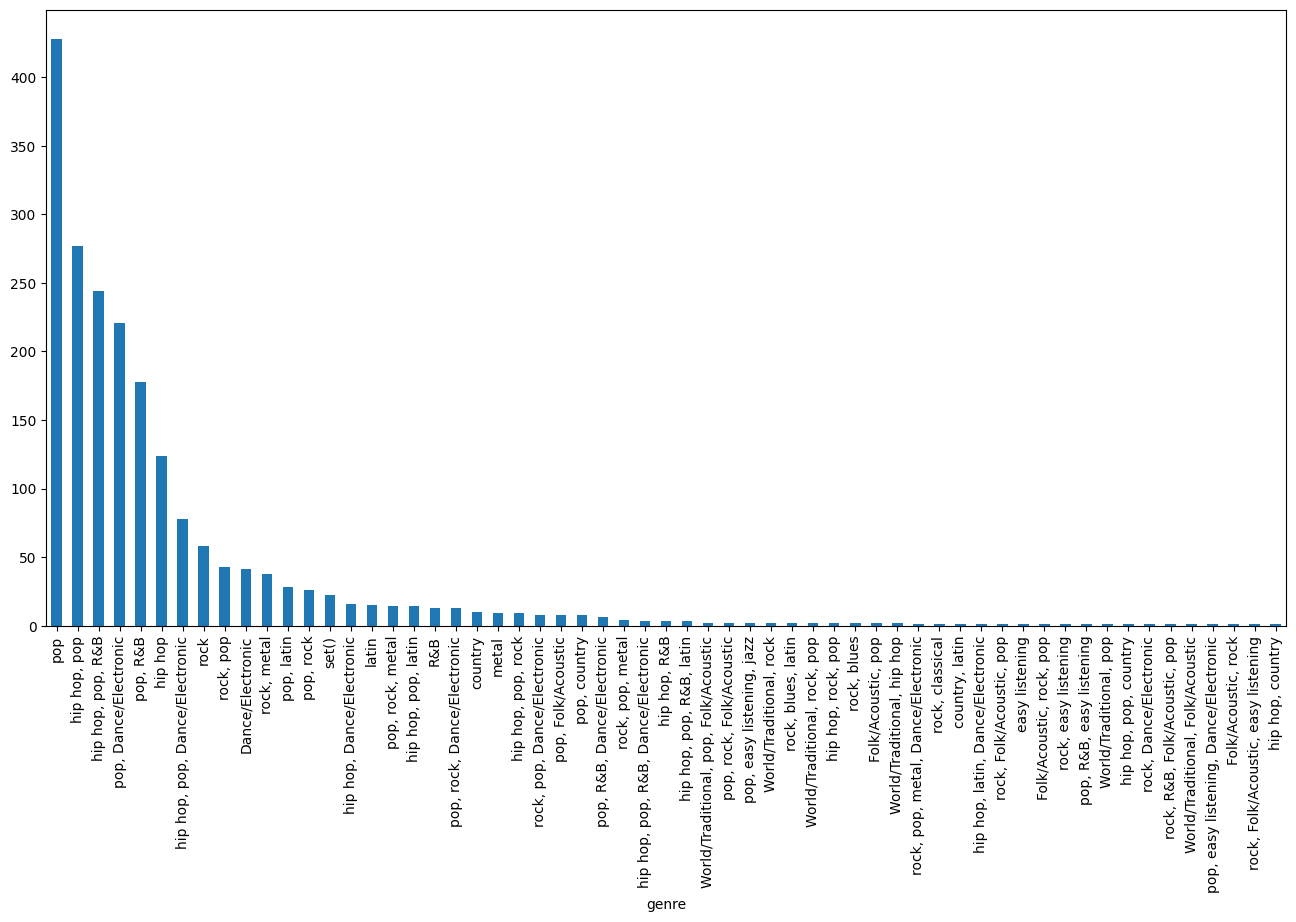

In [ ]:
#All music genres on the list
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv("/content/drive/MyDrive/songs_normalize.csv")
plt.figure(figsize = (16, 8))
df["genre"].value_counts().plot(kind="bar")

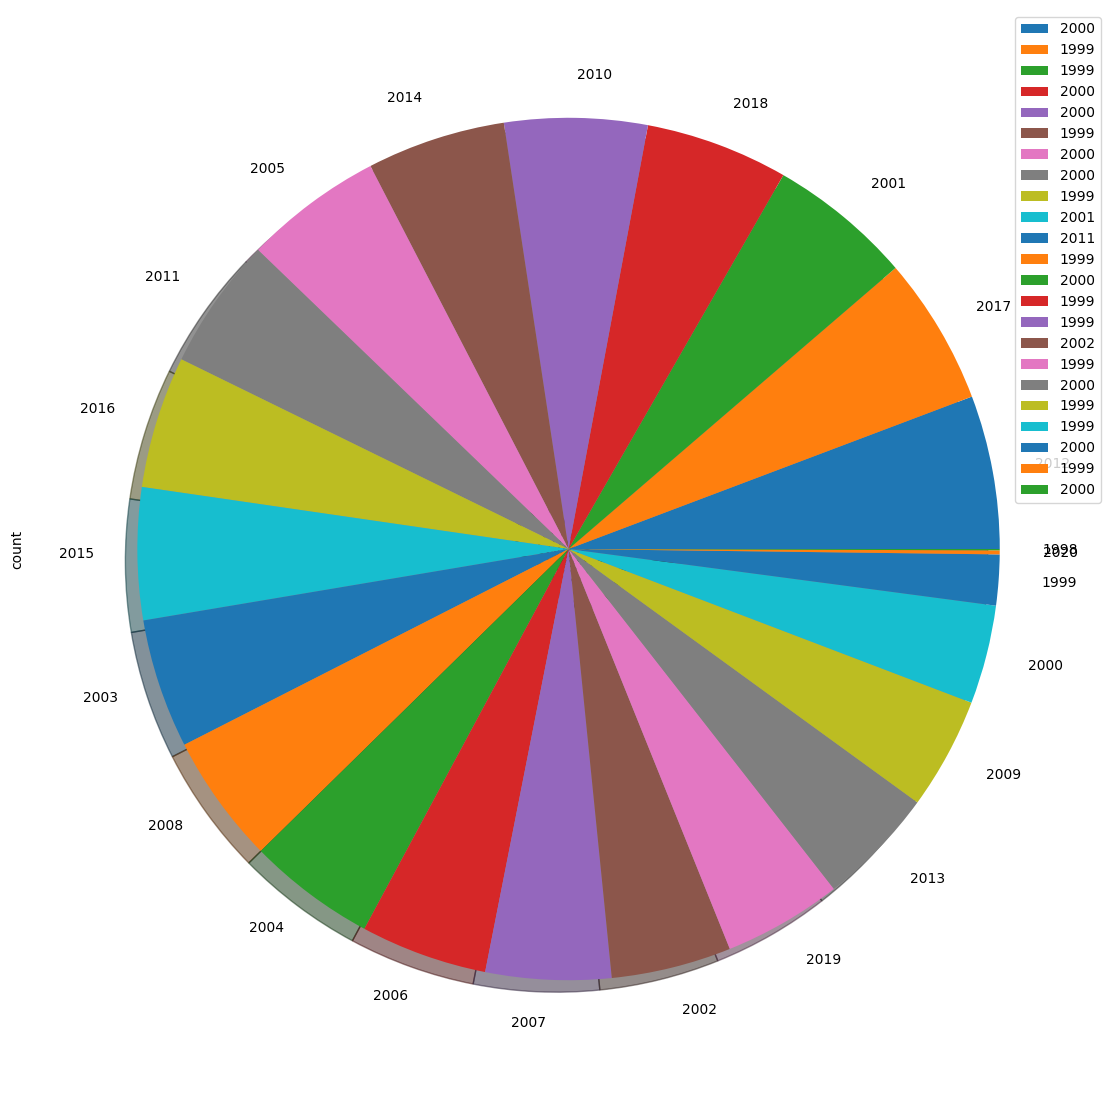

In [ ]:
#Frequency of popular songs by year
plt.figure(figsize = (16, 14))
df["year"].value_counts().plot(kind="pie",shadow=True)
plt.legend(df["year"])

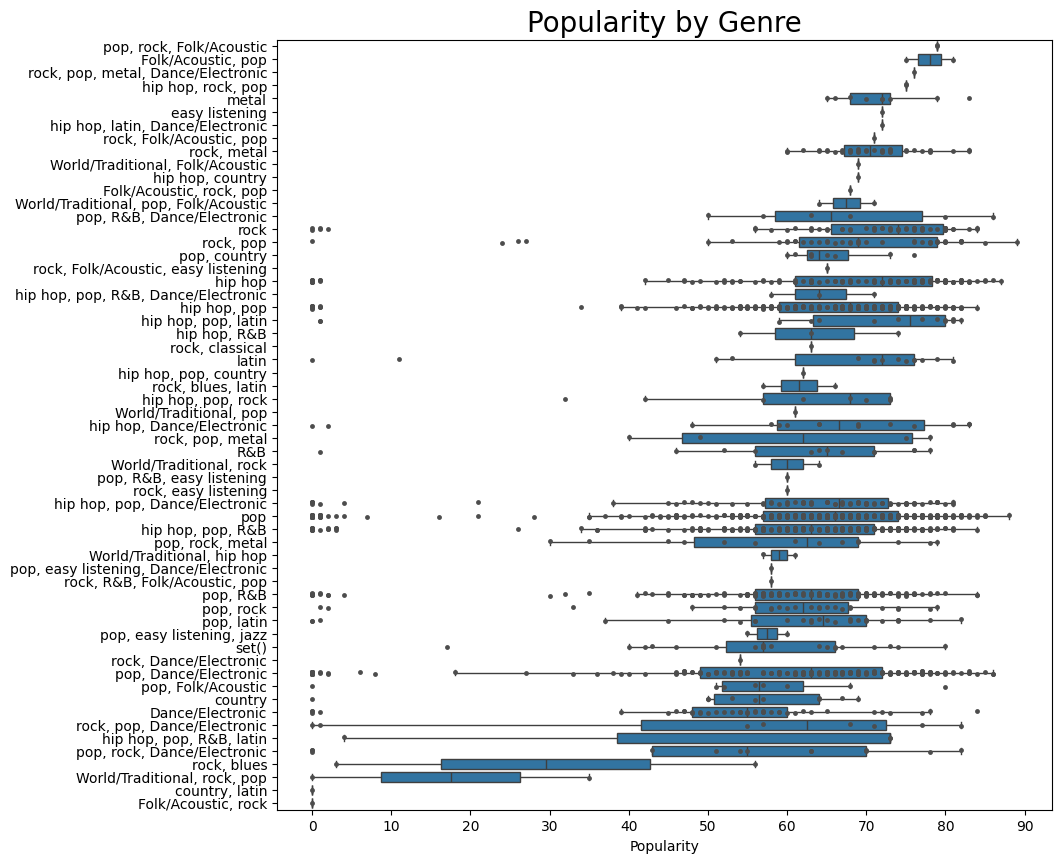

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
order = df.groupby("genre")["popularity"].mean().sort_values(ascending=False).index.values
ax = sns.boxplot(x="popularity", y="genre", data=df,
                  order=order, fliersize=0)
sns.stripplot(x="popularity", y="genre", data=df,
              order=order, color=".3", size=3.5)
ax.set_title("Popularity by Genre", fontsize=20)
ax.set_ylabel("")
ax.set_xlabel("Popularity")
ax.set_xticks(np.arange(0, 91, 10))
plt.show()


Text(0.5, 0, 'Average popularity')

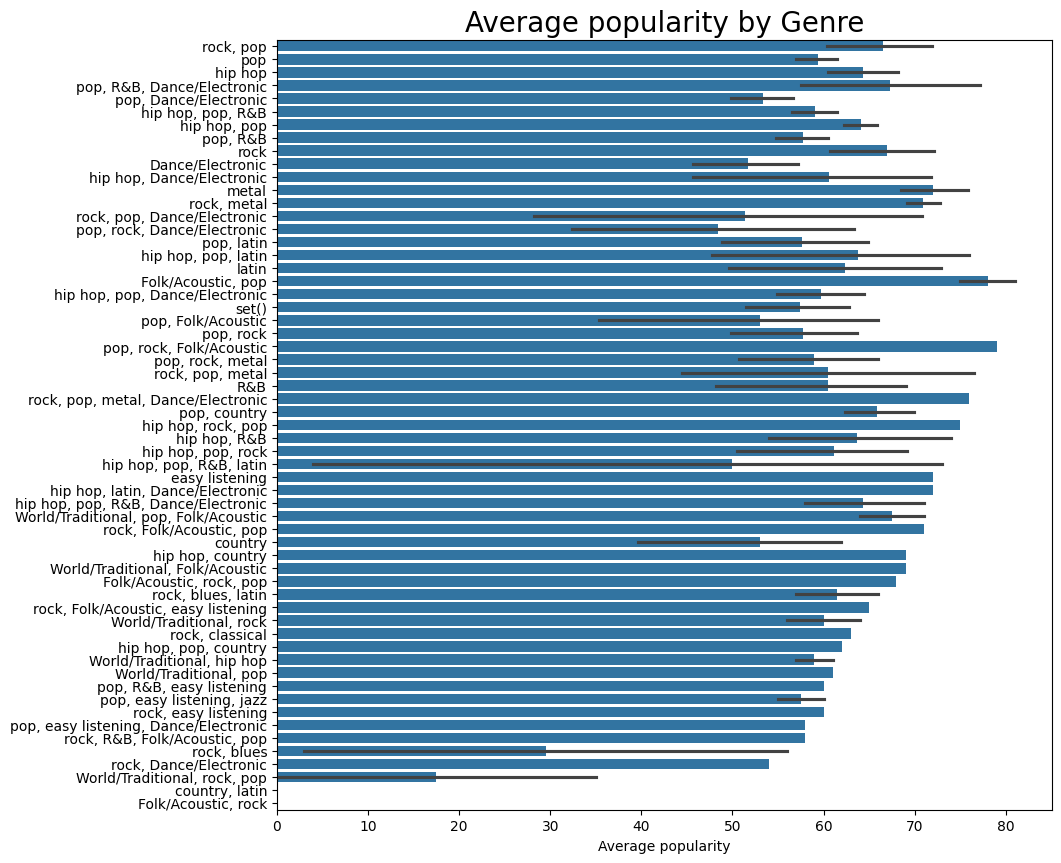

In [ ]:
# Popularity by genres
plt.rcParams["figure.figsize"] = (10,10)
ax = sns.barplot(x="popularity", y="genre",data=df.sort_values("popularity", ascending=False))
ax.set_title("Average popularity by Genre", fontsize=20)
ax.set_ylabel("")
ax.set_xlabel("Average popularity")

<Axes: xlabel='genre', ylabel='year'>

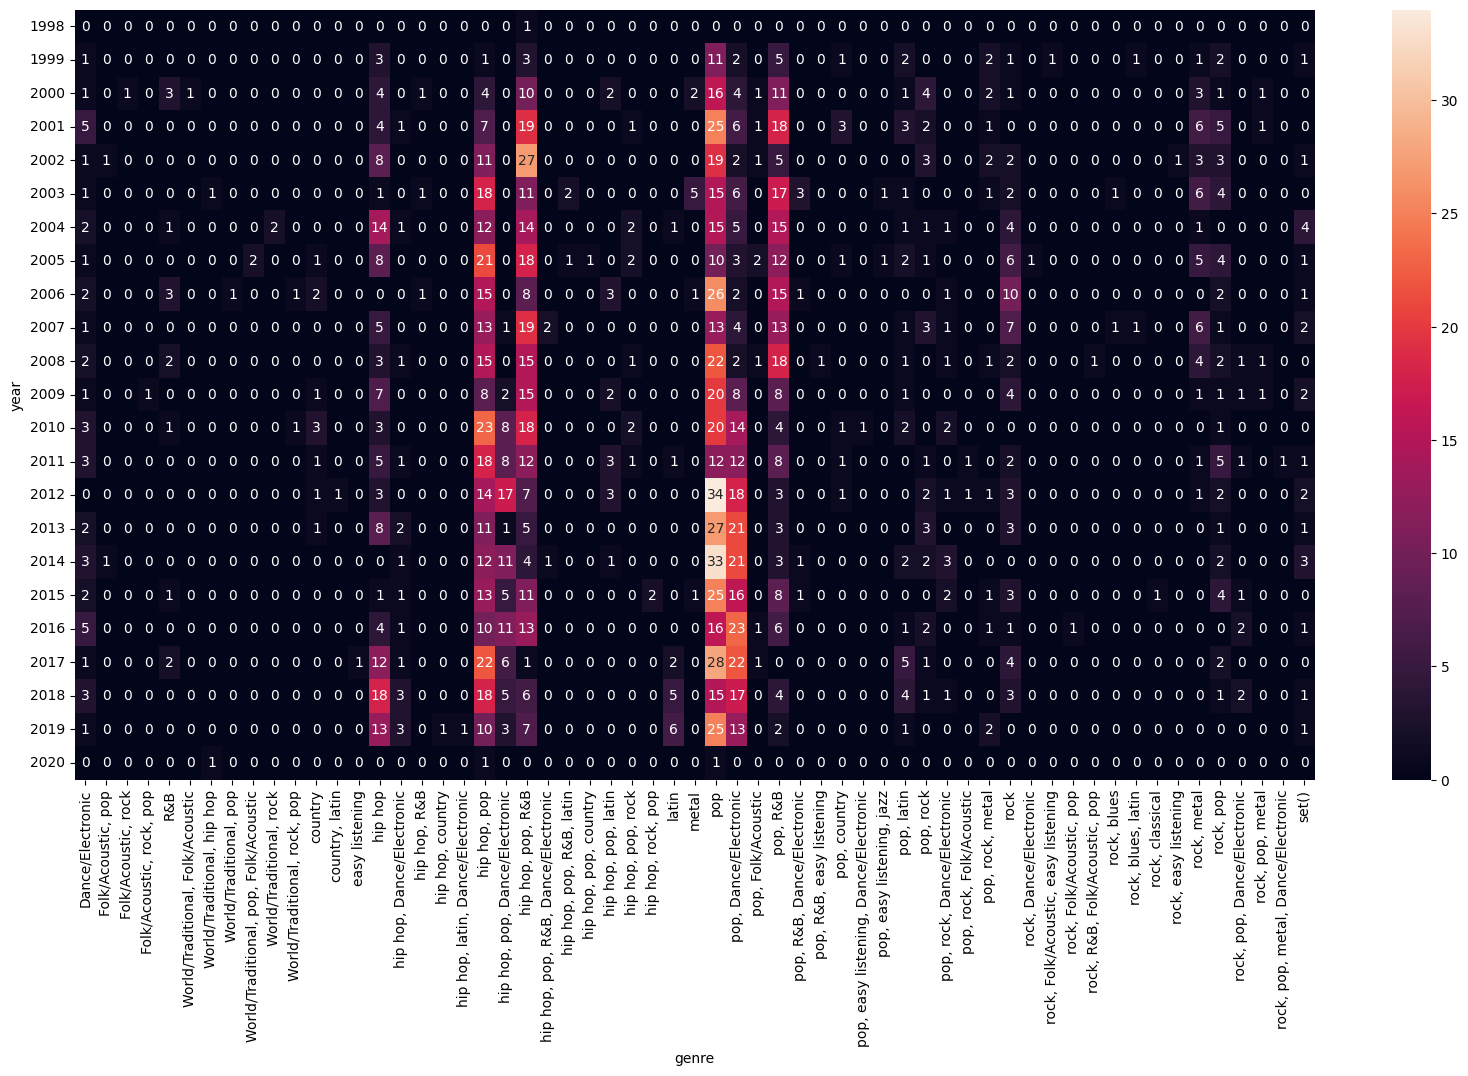

In [ ]:
df_ = (df.filter(['year', 'genre']).groupby(['year', 'genre']).size().unstack(fill_value=0))

plt.figure(figsize=(20,10))
sns.heatmap(data=df_, annot=True)

Logistic classification


Accuracy: 0.685
Confusion Matrix:
[[  2 126]
 [  0 272]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.02      0.03       128
           1       0.68      1.00      0.81       272

    accuracy                           0.69       400
   macro avg       0.84      0.51      0.42       400
weighted avg       0.78      0.69      0.56       400



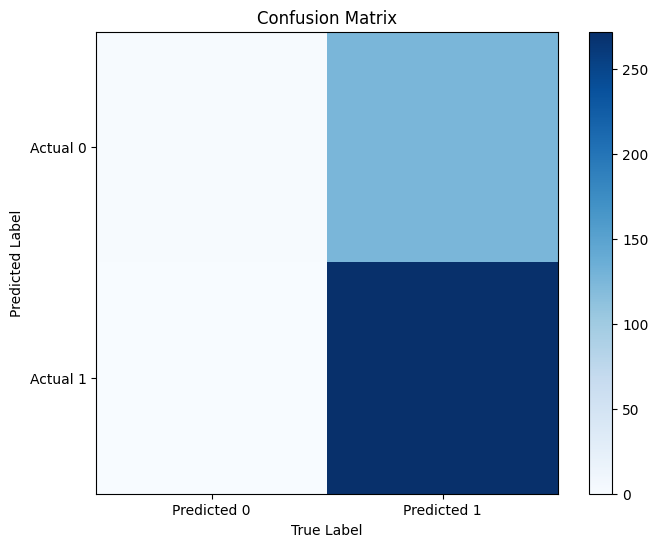

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load dataset
data = pd.read_csv("/content/songs_normalize.csv")

# Remove unnecessary columns
data = data.drop(columns=['artist', 'song', 'explicit', 'year', 'genre'])

# Preprocessing
# Handle missing values and encode categorical variables if any
# For simplicity, we'll drop rows with missing values in this example
data = data.dropna()

# Feature Selection
X = data.drop(columns=['popularity'])  # Features
y = data['popularity']  # Target

# Binarize the target variable (assuming binary classification)
y = (y >= y.mean()).astype(int)  # Convert to binary (1 if popularity is above average, else 0)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Model training
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['Actual 0', 'Actual 1'])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()


KNN Classification


Accuracy: 0.0525

Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.38      0.16        24
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         4
           3       0.20      1.00      0.33         1
           4       1.00      0.00      0.00         2
           6       0.00      1.00      0.00         0
           8       1.00      0.00      0.00         1
          16       0.00      1.00      0.00         0
          17       0.00      1.00      0.00         0
          18       1.00      0.00      0.00         1
          21       0.00      1.00      0.00         0
          24       0.00      1.00      0.00         0
          27       0.00      1.00      0.00         0
          30       1.00      0.00      0.00         2
          32       1.00      0.00      0.00         1
          33       0.00      1.00      0.00         0
          34       0.00      0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Cross-validation Scores: [0.0375   0.04375  0.0375   0.040625 0.0375  ]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

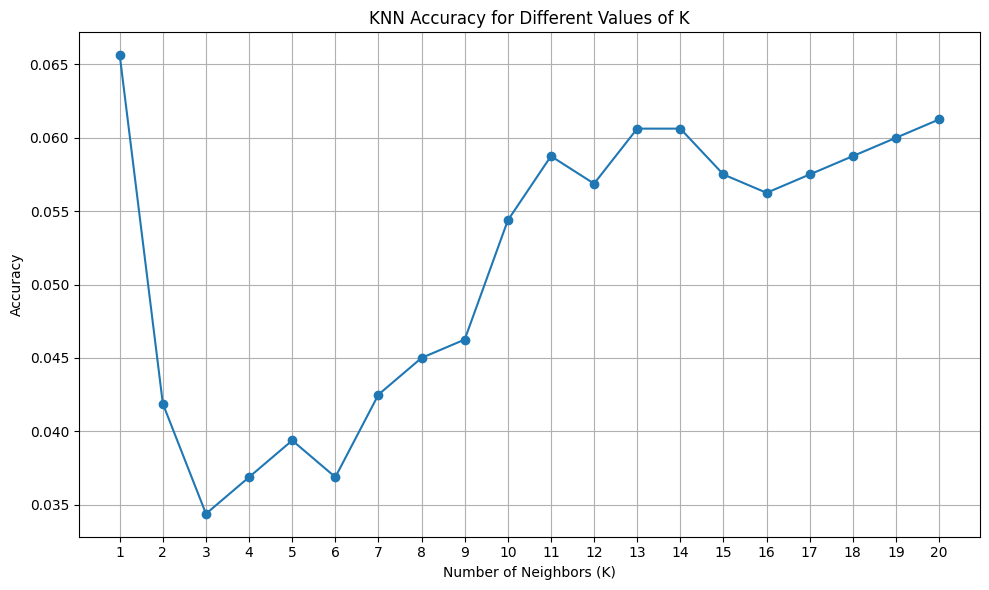

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("/content/songs_normalize.csv")

# Drop non-numeric columns and target column
X = data.drop(columns=['popularity', 'artist', 'song', 'genre'])
y = data['popularity']

# Encode categorical boolean column 'explicit' to numeric
X['explicit'] = LabelEncoder().fit_transform(X['explicit'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection: KNN Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Cross-validation scores
cv_scores = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=5)
print("\nCross-validation Scores:", cv_scores)

# Initialize a list to store the cross-validation scores for different values of K
k_values = list(range(1, 21))
accuracy_scores = []

# Iterate over different values of K
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=5)
    accuracy_scores.append(np.mean(cv_scores))

# Plotting the KNN graph for accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('KNN Accuracy for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

Accuracy: 0.0625

Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.79      0.18        24
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         2
          32       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         2
          40       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         0
          42       0.00      0.00      0.00         1
          44       0.00      0.00      0.00         1
          45       0.00      0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.


Cross-validation Scores: [0.08125  0.053125 0.06875  0.071875 0.065625]


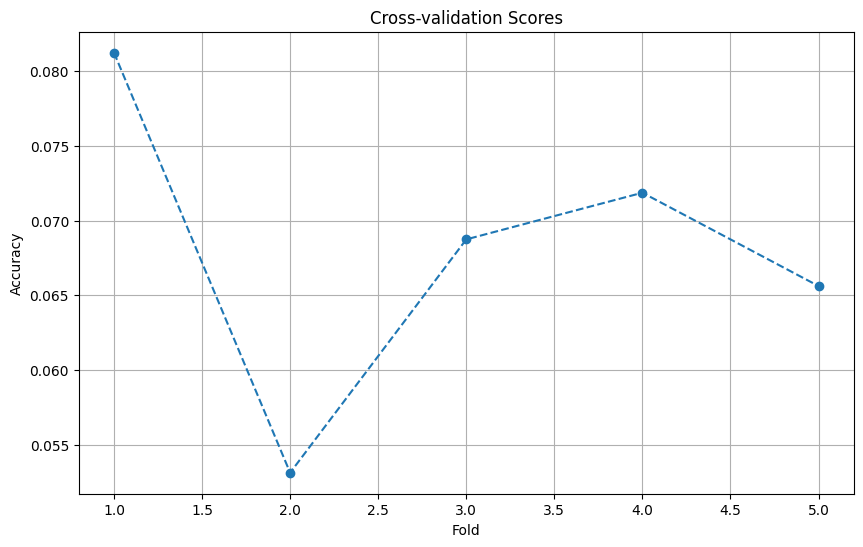

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("/content/songs_normalize.csv")

# Drop non-numeric columns and target column
X = data.drop(columns=['popularity', 'artist', 'song', 'genre'])
y_popularity = data['popularity']
y_genre = data['genre']

# Encode categorical boolean column 'explicit' to numeric
X['explicit'] = LabelEncoder().fit_transform(X['explicit'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_popularity, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection: SVM Classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Cross-validation scores
cv_scores = cross_val_score(svm_classifier, X_train_scaled, y_train, cv=5)
print("\nCross-validation Scores:", cv_scores)

# Plotting cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='--')
plt.title("Cross-validation Scores")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


MLP classification


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being se

Accuracy: 0.055

Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.29      0.16        24
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         2
          32       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         2
          38       0.00      0.00      0.00         0
          40       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         0
          42       0.00      0.00      0.00         1
          43       0.00      0.00      0.00         0
          44       1.00      1.00      1.

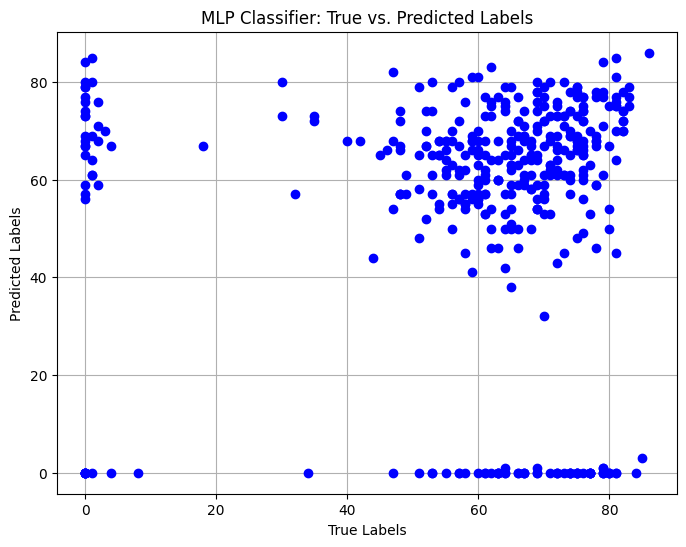

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("/content/songs_normalize.csv")

# Drop non-numeric columns and target column
X = data.drop(columns=['popularity', 'artist', 'song', 'genre'])
y = data['popularity']

# Encode categorical boolean column 'explicit' to numeric
X['explicit'] = LabelEncoder().fit_transform(X['explicit'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', random_state=42)

# Train the model
mlp_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = mlp_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting the accuracy
plt.figure(figsize=(8, 6))
plt.plot(y_test, y_pred, 'o', color='blue')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('MLP Classifier: True vs. Predicted Labels')
plt.grid(True)
plt.show()


Decision Tree classification


Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')
Accuracy: 0.0725


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.12      0.71      0.20        24
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         2
          32       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         2
          40       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         1
          44       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         1
          46       0.00      0.00      0.00         1
          47       0.00      0.00      0.00         4
          48       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


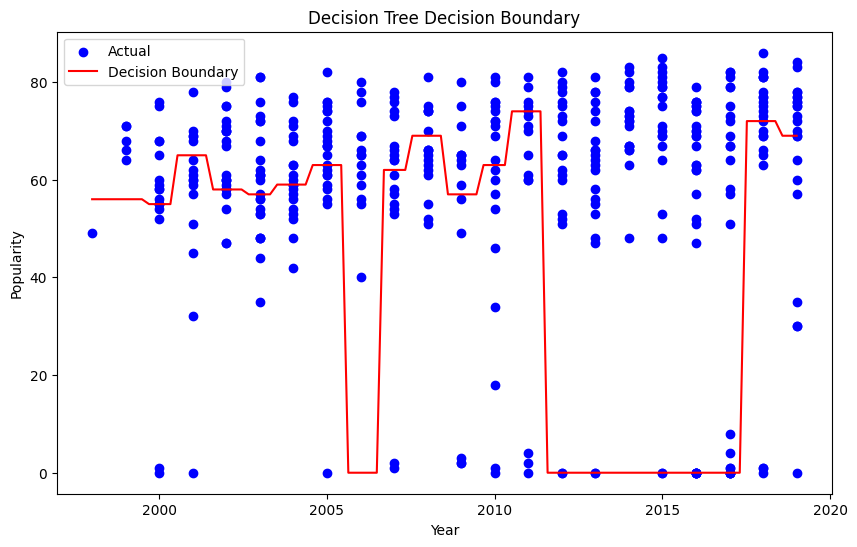

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Provided dataset
data = pd.read_csv("/content/songs_normalize.csv")

# Verify column names in the dataset
print(data.columns)

# Split data into features and target
X = data[['year']]  # Make sure to use the correct column name from your dataset
y = data['popularity']  # Update target variable to 'popularity'

# Convert the categorical variable "genre" into numerical form using LabelEncoder
label_encoder = LabelEncoder()
data['genre'] = label_encoder.fit_transform(data['genre'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit decision tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Predict
predictions = decision_tree_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, predictions))

# Plot the decision boundary
plt.figure(figsize=(10, 6))

# Plot actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Plot decision boundary
x_values = np.linspace(min(X_test.values), max(X_test.values), 100).reshape(-1, 1)
y_values = decision_tree_model.predict(x_values)
plt.plot(x_values, y_values, color='red', label='Decision Boundary')

# Add labels and title
plt.title('Decision Tree Decision Boundary')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.legend()

# Show plot
plt.show()


Random Forest Classification


Accuracy: 0.1175

Classification Report:
              precision    recall  f1-score   support

           0       0.13      0.54      0.21        24
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         4
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         2
          32       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         2
          38       0.00      0.00      0.00         0
          39       0.00      0.00      0.00         0
          40       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         0
          42       0.00      0.00      0.00         1
          44       1.00      1.00      1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.


Cross-validation Scores: [0.11875 0.05625 0.1     0.0875  0.075  ]


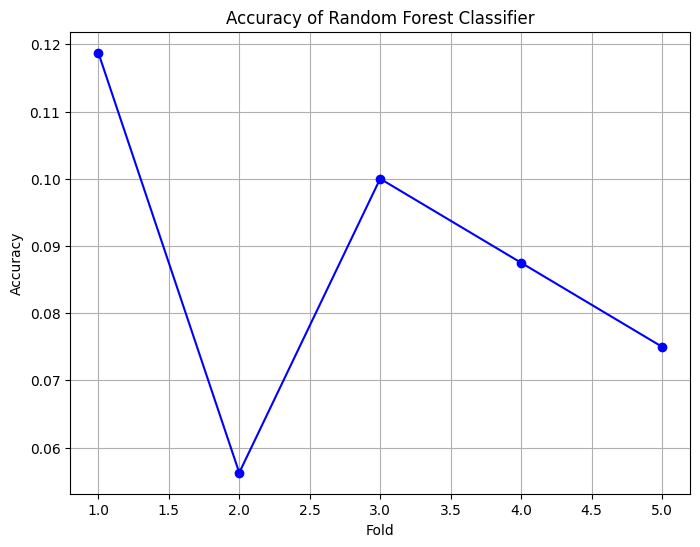

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("/content/songs_normalize.csv")

# Drop non-numeric columns and target column
X = data.drop(columns=['popularity', 'artist', 'song', 'genre'])
y = data['popularity']

# Encode categorical boolean column 'explicit' to numeric
X['explicit'] = LabelEncoder().fit_transform(X['explicit'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection: Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Cross-validation scores
cv_scores = cross_val_score(rf_classifier, X_train_scaled, y_train, cv=5)
print("\nCross-validation Scores:", cv_scores)

# Plotting the accuracy of Random Forest Classifier
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy of Random Forest Classifier')
plt.grid(True)
plt.show()




Ridge classification

Accuracy: 0.0675

Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.79      0.16        24
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         2
          32       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         2
          40       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         1
          44       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         1
          46       0.00      0.00      0.00         1
          47       0.00      0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


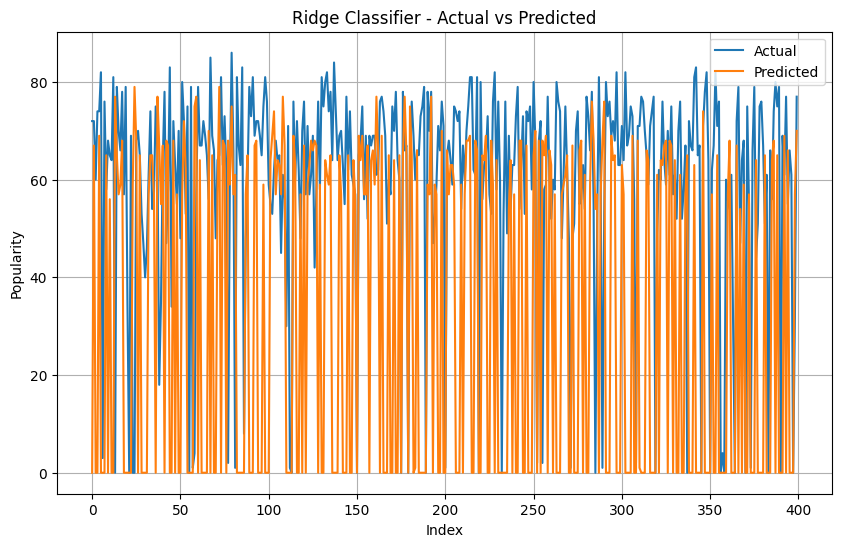

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("/content/songs_normalize.csv")

# Convert non-numeric columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

# Define features (X) and target variable (y)
X = data.drop(columns=['popularity'])
y = data['popularity']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Ridge classifier
ridge_classifier = RidgeClassifier()

# Train the model
ridge_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = ridge_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting the Ridge Classifier graph
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title('Ridge Classifier - Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Popularity')
plt.legend()
plt.grid(True)
plt.show()
